In [5]:
# read zip file
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# unzip file
!unzip gdrive/My\ Drive/kagglecatsanddogs_5340

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

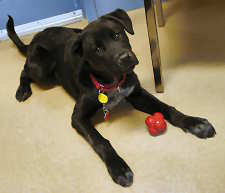

In [7]:
import tensorflow as tf
img= tf.keras.preprocessing.image.load_img('PetImages/Dog/9438.jpg')
img

In [8]:
# list images
!ls "PetImages/"

Cat  Dog


In [9]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os
from tqdm import tqdm

In [10]:
# Number of Dog images
len(os.listdir("PetImages/Dog"))

12501

In [11]:
# Number of Cat images
len(os.listdir("PetImages/Cat"))

12501

In [12]:
# Generate Path
DataPath = pathlib.Path("PetImages")
all_paths = DataPath.glob("*/*.jpg")
all_paths

<generator object Path.glob at 0x7fe461c680b0>

In [13]:
# cast path into list
all_paths = list(all_paths)
all_paths[:10]

[PosixPath('PetImages/Dog/8333.jpg'),
 PosixPath('PetImages/Dog/7499.jpg'),
 PosixPath('PetImages/Dog/7620.jpg'),
 PosixPath('PetImages/Dog/153.jpg'),
 PosixPath('PetImages/Dog/2720.jpg'),
 PosixPath('PetImages/Dog/2283.jpg'),
 PosixPath('PetImages/Dog/2026.jpg'),
 PosixPath('PetImages/Dog/1335.jpg'),
 PosixPath('PetImages/Dog/12125.jpg'),
 PosixPath('PetImages/Dog/5262.jpg')]

In [14]:
# convert into string
all_paths = list(map(lambda x : str(x), all_paths))
all_paths[:10]

['PetImages/Dog/8333.jpg',
 'PetImages/Dog/7499.jpg',
 'PetImages/Dog/7620.jpg',
 'PetImages/Dog/153.jpg',
 'PetImages/Dog/2720.jpg',
 'PetImages/Dog/2283.jpg',
 'PetImages/Dog/2026.jpg',
 'PetImages/Dog/1335.jpg',
 'PetImages/Dog/12125.jpg',
 'PetImages/Dog/5262.jpg']

In [15]:
from random import shuffle
shuffle(all_paths)
all_paths[:10]

['PetImages/Dog/2289.jpg',
 'PetImages/Dog/11968.jpg',
 'PetImages/Dog/11584.jpg',
 'PetImages/Dog/10606.jpg',
 'PetImages/Cat/569.jpg',
 'PetImages/Dog/6412.jpg',
 'PetImages/Dog/8852.jpg',
 'PetImages/Dog/3960.jpg',
 'PetImages/Dog/2947.jpg',
 'PetImages/Dog/4588.jpg']

In [16]:

# test image quality
def TestImageQuality(all_paths):
    new_all_paths = []
    for path in tqdm(all_paths):
        try:
            image= tf.io.read_file(path)
            image = tf.io.decode_jpeg(image, channels = 3)
        except:
            continue
        new_all_paths.append(path)
    return new_all_paths

all_paths = TestImageQuality(all_paths)
all_paths[:10]

100%|██████████| 25000/25000 [00:43<00:00, 569.09it/s]


['PetImages/Dog/2289.jpg',
 'PetImages/Dog/11968.jpg',
 'PetImages/Dog/11584.jpg',
 'PetImages/Dog/10606.jpg',
 'PetImages/Cat/569.jpg',
 'PetImages/Dog/6412.jpg',
 'PetImages/Dog/8852.jpg',
 'PetImages/Dog/3960.jpg',
 'PetImages/Dog/2947.jpg',
 'PetImages/Dog/4588.jpg']

In [18]:
# getting their respective labels
def get_label(image_path):
    return image_path.split("/")[-2]

all_labels = list(map(lambda x: get_label(x), all_paths))
all_labels[:10]

['Dog', 'Dog', 'Dog', 'Dog', 'Cat', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog']

In [19]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
all_labels = Le.fit_transform(all_labels)

all_labels[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [20]:
from sklearn.model_selection import train_test_split

Train_paths, val_paths, Train_labels, val_labels = train_test_split(all_paths, 
                                                                    all_labels)
Train_paths[:10], Train_labels[:10]

(['PetImages/Cat/11237.jpg',
  'PetImages/Cat/6495.jpg',
  'PetImages/Dog/591.jpg',
  'PetImages/Cat/2303.jpg',
  'PetImages/Dog/2105.jpg',
  'PetImages/Dog/4799.jpg',
  'PetImages/Dog/8976.jpg',
  'PetImages/Dog/8389.jpg',
  'PetImages/Dog/2939.jpg',
  'PetImages/Cat/5628.jpg'],
 array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0]))

In [21]:
# Function used to decode jpeg into Tensor

def load(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    return image, label

In [22]:
# Define Image size and Batch size

IMG_SIZE = 224
BATCH_SIZE = 128

# Basic Transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)
])
#Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(-0.3, -0.2))
])

In [23]:
# Function used to Create a Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE

def get_dataset(paths, labels, train =True):
    image_paths = tf.convert_to_tensor(paths)
    lables = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dateset.from_tensor_slices(image_paths)
    label_dataset = tf.data.dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset, label_dataset))

    dataset = dataset.map(lambda image, label: load(image, label))
    dataset = dataset.map(lambda image, label:(resize(image), label), num_parallel_calls =AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train: 
        dataset = dataset.map(lambda image, label :(data_augmentation(image), label), num_parallel_calls=AUTOTUNE)
    return dataset


In [27]:
# Creating Train Dataset object and Verifying it
# %time train_dataset = get_dataset(Train_paths, Train_labels)

# image, label = next(iter(train_dataset))
# print(image.shape)
# print(label.shape)


In [29]:
# View a sample Training Image
# print(Le.inverse_transform(label)[0])
# plt.imshow((image[0].numpy()/255).reshape(224, 224, 3))

In [31]:
# %time val_dataset = get_dataset(Val_paths , Val_labels , train = False)

# image , label = next(iter(val_dataset))
# print(image.shape)
# print(label.shape)

In [33]:
# # View a sample Training Image
# print(Le.inverse_transform(label)[0])
# plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [35]:
# Model part
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalMaxPool2D

In [40]:
model = Sequential()
# Block 1 
model.add(Conv2D(input_shape=(224 , 224 , 3),  padding='same',filters=32, kernel_size=(7, 7)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(filters=64,  padding='valid', kernel_size=(5, 5)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 3 
model.add(Conv2D(filters=128, padding='valid', kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

# Block 4 
model.add(Conv2D(filters=256, padding='valid', kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256 , kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(GlobalMaxPool2D())

model.add(Dense(units=256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.add(Activation('sigmoid'))


In [42]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      4736      
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 64)     

In [43]:
model.compile(
    loss = "binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

In [47]:
# # Train the model
# history = model.fit(
#     train_dataset,
#     steps_per_epoch = len(Train_paths)//BATCH_SIZE,
#     epochs=10,
#     validation_data=val_dataset,
#     validation_steps = len(val_paths)//BATCH_SIZE,
# )

In [49]:
# Evaluating the loaded model
# loss, acc = model.evaluate(val_dataset)

# print(" Testing Acc : " , acc)
# print(" Testing Loss : " , loss)